## Controversial looks: The more the better.

It's a good thing to have haters, if you don't that's when you should be worried. There's an undeniable pattern with people with highly controversial looks and being more attractive than those with more agreeable looks. 

This is shown by examining the tails of the std deviation distributions. The higher the std the more controversial.

At first we notice a split camp using the 75th percentile of the std distribution. That is, the attraction levels seem to be on both ends of the attraction curve but as we walk further down at the higher end of volatility, the more attractive.



In [1]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from umap import UMAP
from image_helpers import *
from tsne import image_scatter_plot
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_context("poster")
%pylab inline

import warnings
warnings.filterwarnings('ignore')
pylab.rcParams['figure.figsize'] = (15, 15)

Populating the interactive namespace from numpy and matplotlib


count    5500.000000
mean        2.990891
std         0.688112
min         1.016667
25%         2.500000
50%         2.833333
75%         3.533333
max         4.750000
Name: mean_rating, dtype: float64
skew --  0.3741395890864243
kurtosis -- -0.6103667903222889


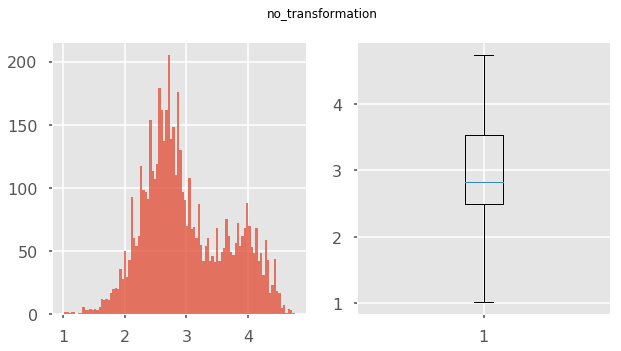

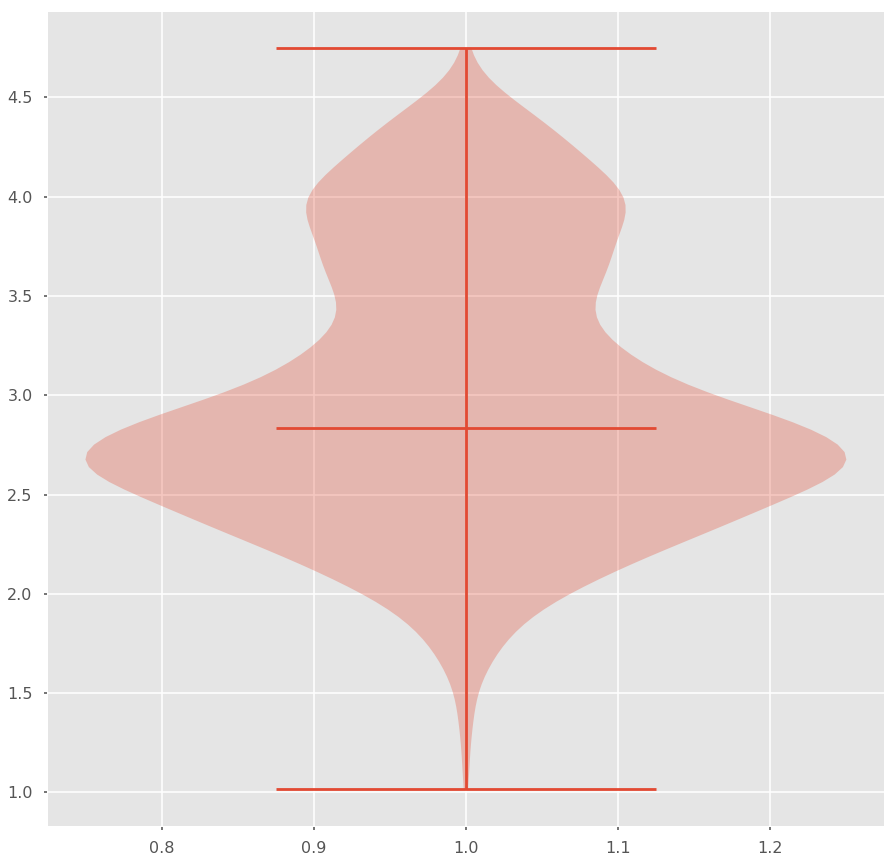

In [2]:
df_labels = pd.read_csv('../data/SCUT-FBP5500_v2/train_test_files/All_labels.txt', sep=' ', header=None)
df_labels.columns = ['file_name', 'mean_rating']
plot_distribution(df_labels['mean_rating'])

In [17]:
df_all_ratings = pd.read_excel('../data/SCUT-FBP5500_v2/All_Ratings.xlsx')
df_all_ratings['Filename'].str.startswith('CF')
# df_all_ratings.columns = ['file_name', 'mean_rating']
# plot_distribution(df_labels['mean_rating'])

KeyboardInterrupt: 

count    5500.000000
mean        3.056909
std         0.706423
min         1.000000
25%         3.000000
50%         3.000000
75%         3.500000
max         5.000000
Name: Rating, dtype: float64
skew --  -0.0006558747890151284
kurtosis -- -0.13852954510013138


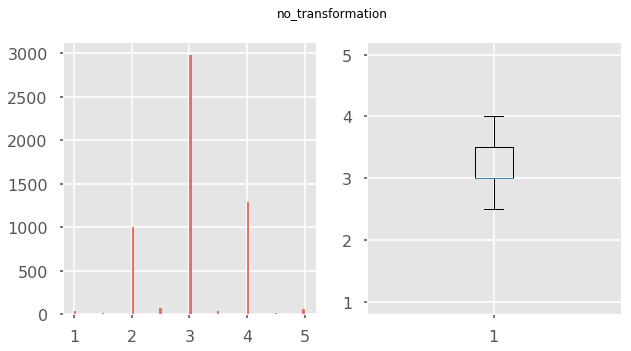

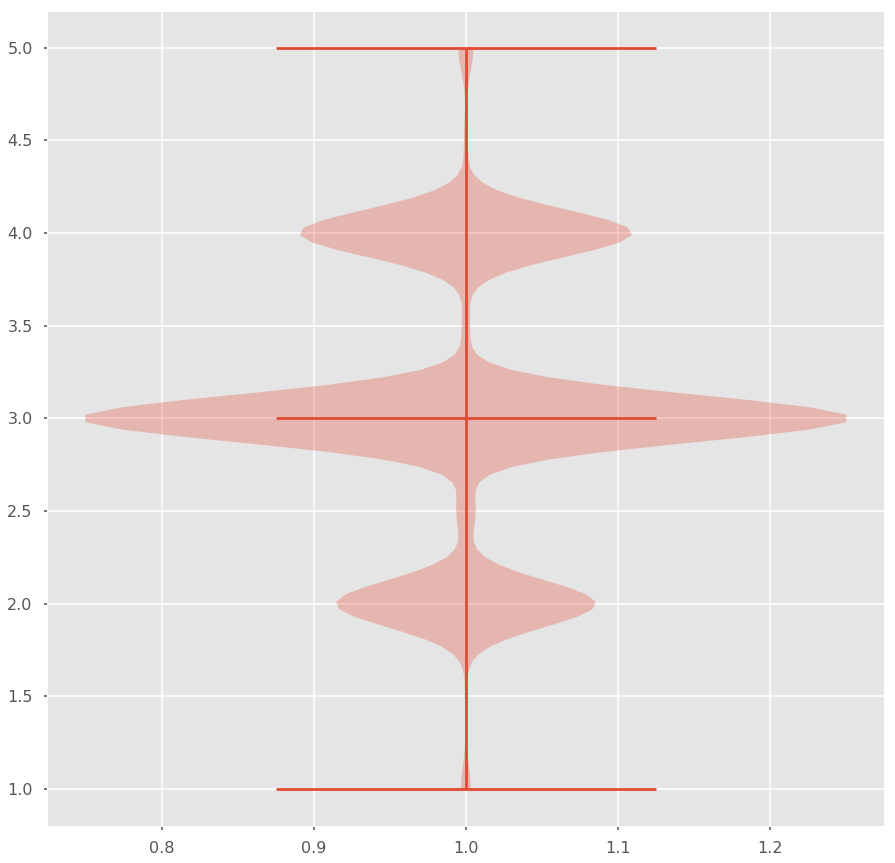

In [10]:
plot_distribution(df_all_ratings.groupby(('Filename'))['Rating'].median())

count    5500.000000
mean        2.990891
std         0.688112
min         1.016667
25%         2.500000
50%         2.833333
75%         3.533333
max         4.750000
Name: Rating, dtype: float64
skew --  0.3741395815164676
kurtosis -- -0.6103667884611896


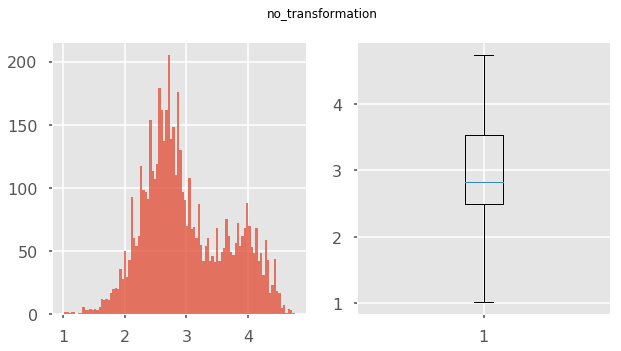

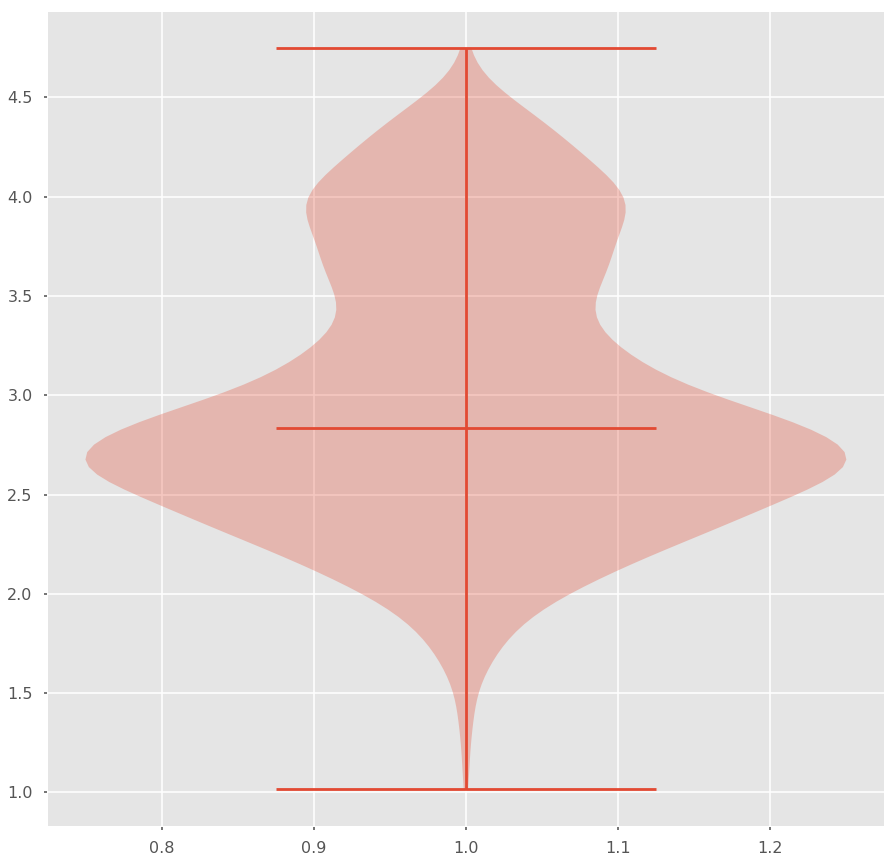

In [11]:

plot_distribution(df_all_ratings.groupby(('Filename'))['Rating'].mean())

count    5500.000000
mean        0.643133
std         0.087729
min         0.129099
25%         0.590652
50%         0.647464
75%         0.700282
max         1.080908
Name: Rating, dtype: float64
skew --  -0.23449289011128974
kurtosis -- 0.8284128106639908


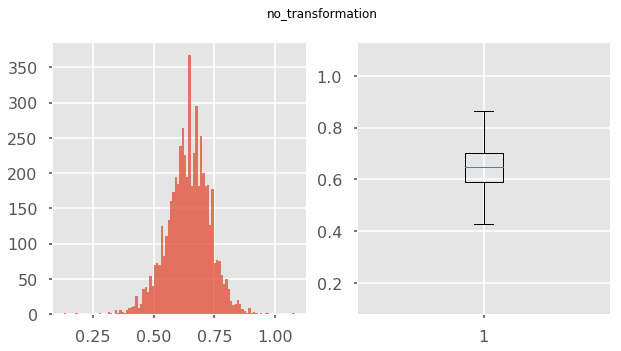

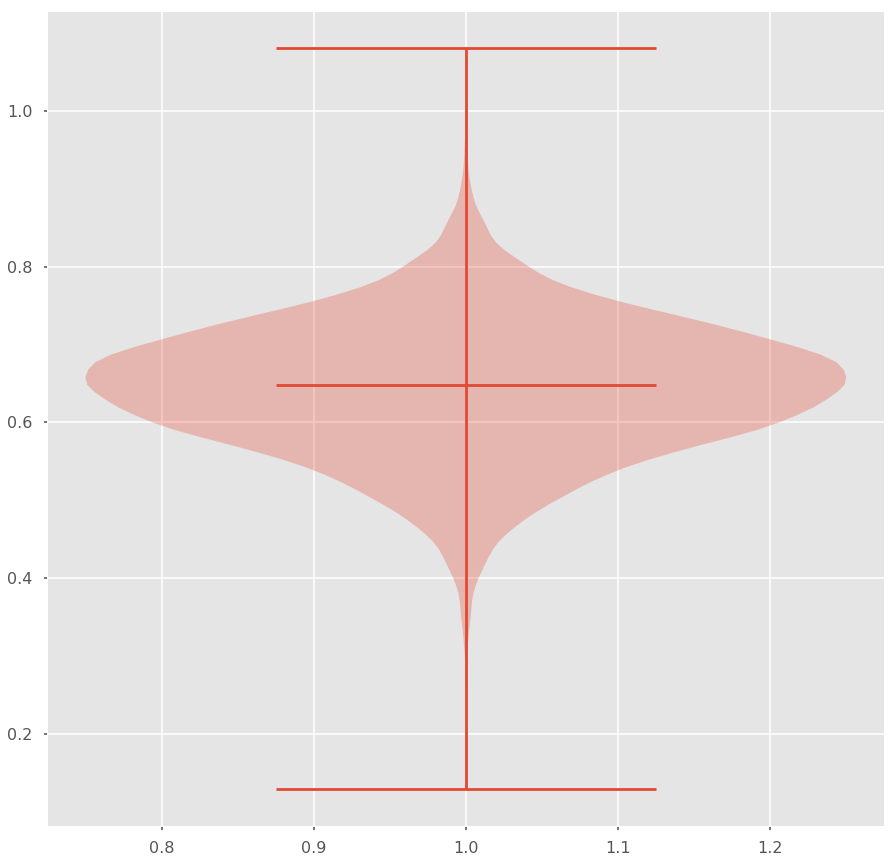

In [13]:
plot_distribution(df_all_ratings.groupby(('Filename'))['Rating'].std())

In [16]:
stdev = df_all_ratings.groupby(('Filename'))['Rating'].std() 
stdev[stdev > 0.7]
# df_all_ratings[df_all_ratings['Filename'].str.startswith('CF')]

Filename
AF1000.jpg    0.712281
AF1001.jpg    0.841038
AF1009.jpg    0.812334
AF1012.jpg    0.721737
AF1013.jpg    0.770025
AF1015.jpg    0.812856
AF1019.jpg    0.719973
AF1024.jpg    0.758381
AF1027.jpg    0.700887
AF1028.jpg    0.724081
AF1031.jpg    0.801834
AF1034.jpg    0.746177
AF1037.jpg    0.713074
AF1038.jpg    0.819777
AF1039.jpg    0.731842
AF1047.jpg    0.708902
AF105.jpg     0.712281
AF1050.jpg    0.724666
AF1052.jpg    0.738566
AF1054.jpg    0.738566
AF1055.jpg    0.723105
AF1058.jpg    0.761169
AF1064.jpg    0.783120
AF1075.jpg    0.729523
AF1077.jpg    0.761169
AF108.jpg     0.761169
AF1086.jpg    0.755208
AF1096.jpg    0.712281
AF1101.jpg    0.731842
AF1105.jpg    0.783120
                ...   
CM709.jpg     0.704104
CM712.jpg     0.740285
CM714.jpg     0.765610
CM716.jpg     0.747123
CM717.jpg     0.822701
CM718.jpg     0.713074
CM72.jpg      0.860955
CM721.jpg     0.780410
CM724.jpg     0.746177
CM725.jpg     0.851055
CM727.jpg     0.774597
CM729.jpg     0.755208
CM

count    1391.000000
mean        3.018152
std         0.759413
min         1.533333
25%         2.283333
50%         3.100000
75%         3.700000
max         4.450000
Name: rating, dtype: float64
skew --  -0.03921126672236976
kurtosis -- -1.4115223775253802


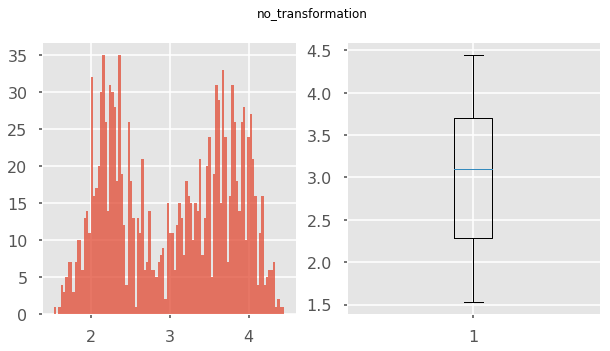

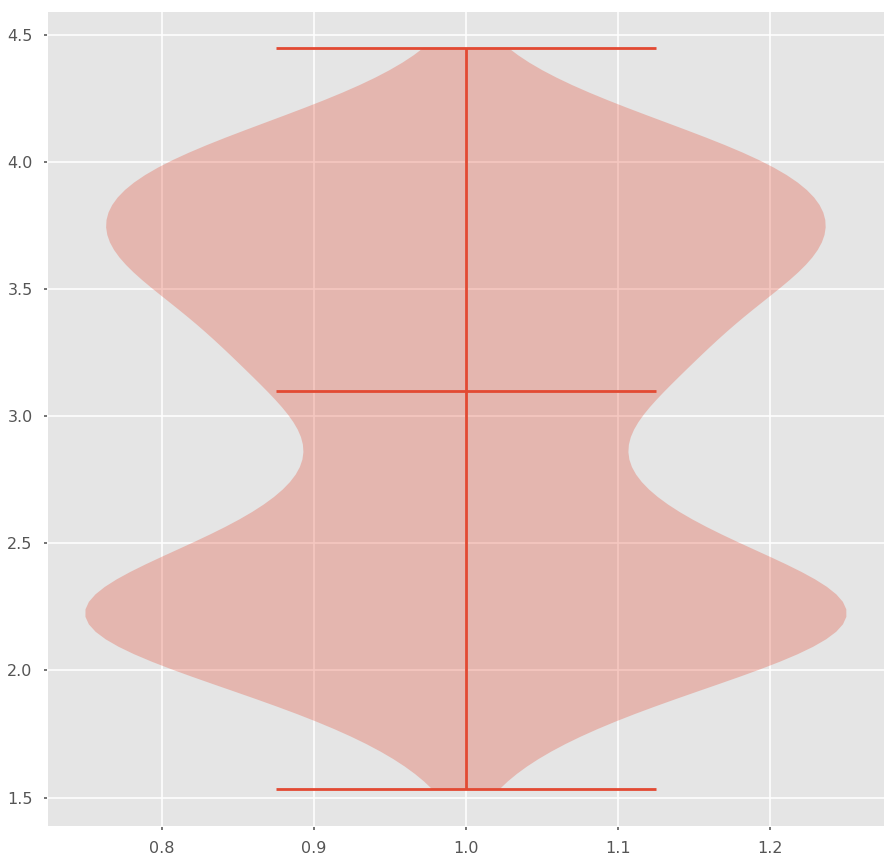

In [25]:
df_all_ratings.groupby(('Filename'))['Rating'].mean()

df = pd.concat([stdev, df_all_ratings.groupby(('Filename'))['Rating'].mean()], axis=1)
df.columns=['vol', 'rating']

plot_distribution(df[df['vol'] > 0.7]['rating'])

count    175.000000
mean       3.331333
std        0.531514
min        1.766667
25%        3.066667
50%        3.433333
75%        3.683333
max        4.183333
Name: rating, dtype: float64
skew --  -0.9960022297255791
kurtosis -- 0.5719510516760087


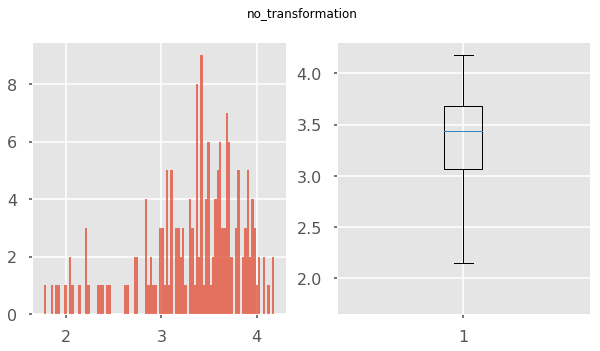

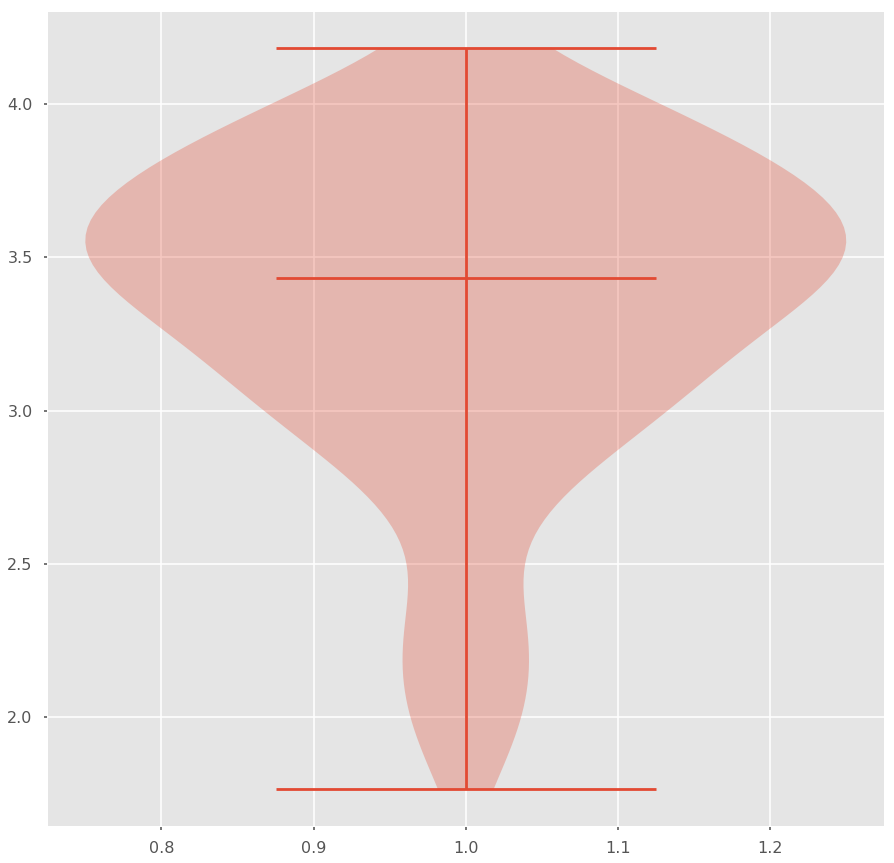

In [30]:
plot_distribution(df[df['vol'] > 0.8]['rating'])

count    1351.000000
mean        2.983432
std         0.543565
min         1.016667
25%         2.716667
50%         2.866667
75%         3.050000
max         4.750000
Name: rating, dtype: float64
skew --  0.9258813381220521
kurtosis -- 3.133832453934498


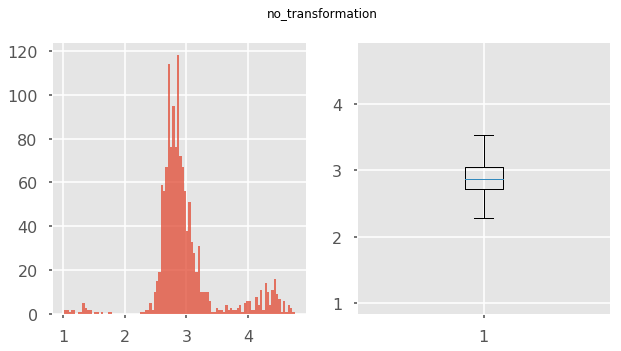

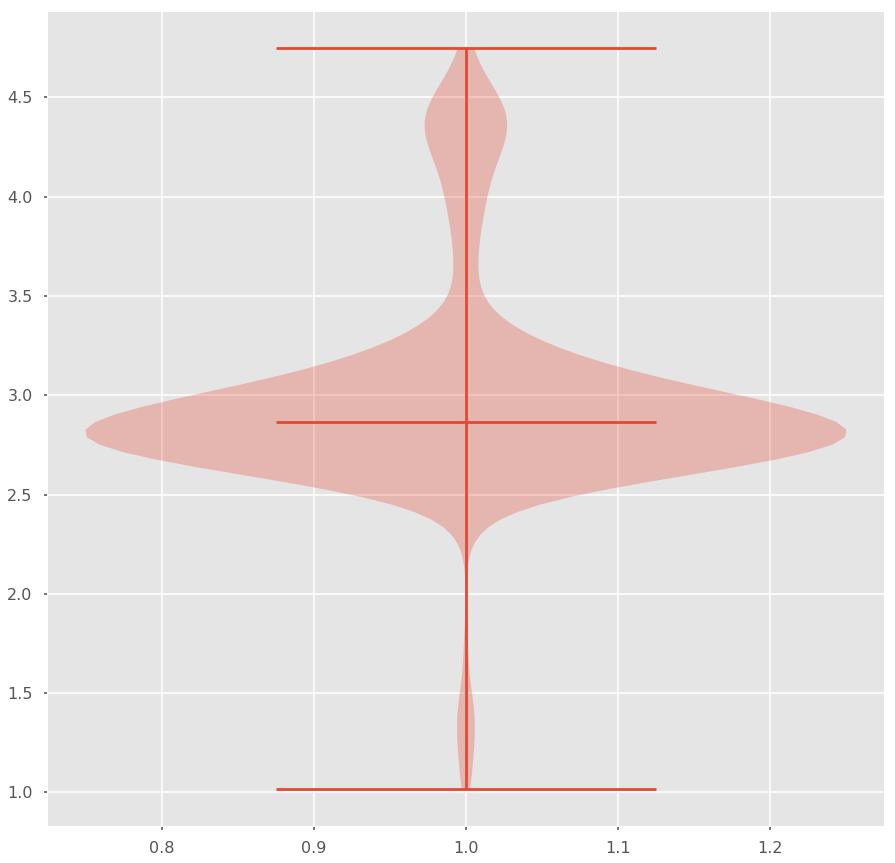

In [29]:
plot_distribution(df[df['vol'] < 0.59]['rating'])

count    34.000000
mean      3.357353
std       0.585317
min       1.850000
25%       3.208333
50%       3.441667
75%       3.766667
max       4.116667
Name: rating, dtype: float64
skew --  -1.1999742011358623
kurtosis -- 0.7403786486133228


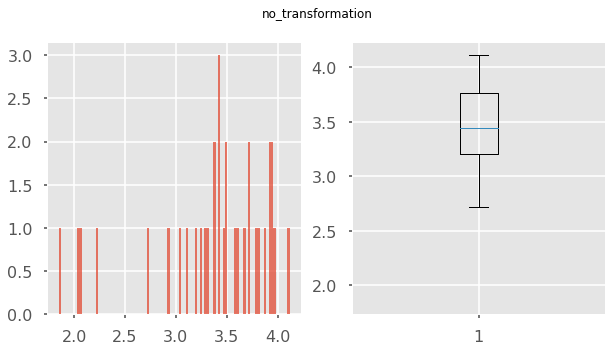

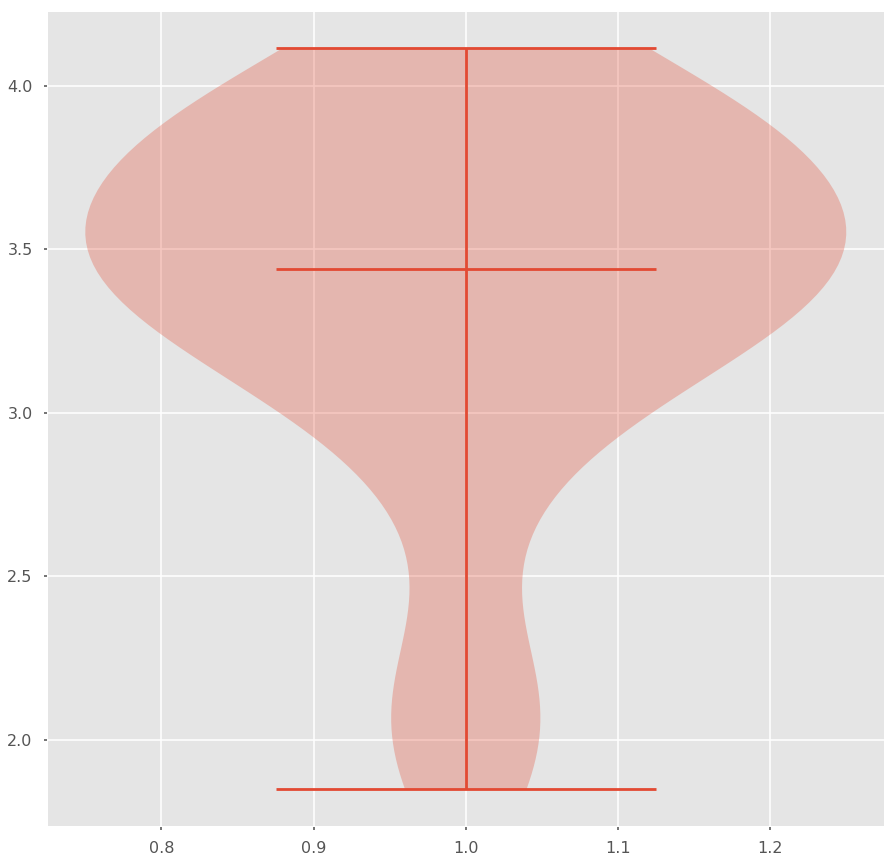

In [43]:
plot_distribution(df.ix[[idx for idx in df[df['vol'] > 0.8].index if idx.startswith('CF') ]]['rating'])


In [45]:
data_, paths_, encodings_, arrays_rescaled_, X_ = load_encodings('../data/CF_ALL_faces_encodings.pickle')


  


In [50]:
paths = [file_path.replace('_face', '').split('/')[-1] for file_path in paths_]

## Cuter and cuter

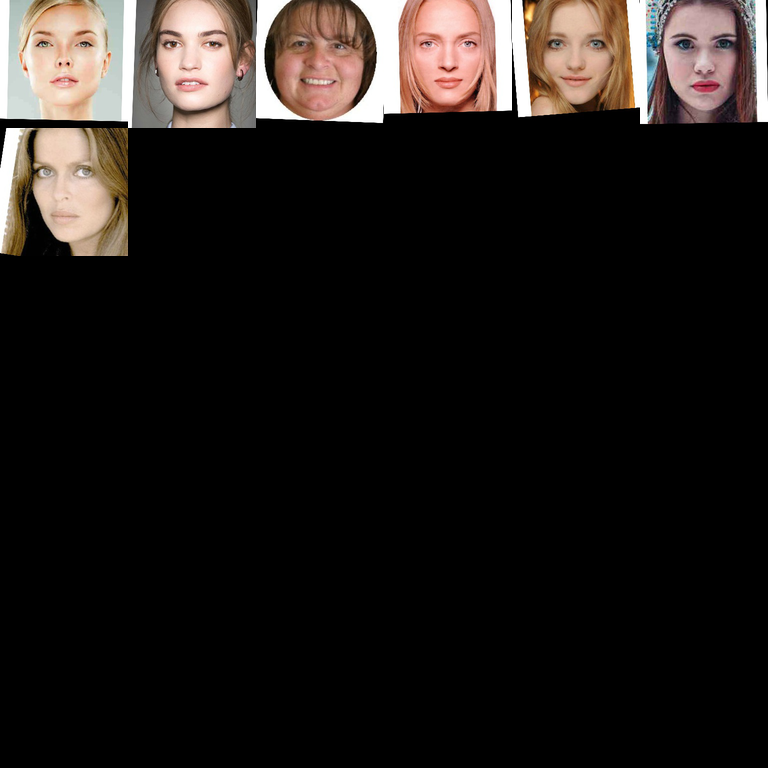

In [76]:
indices = df.ix[[idx for idx in df[df['vol'] > 0.86].index if idx.startswith('CF') ]].index
args = [idx for idx,path in enumerate(paths) if path in indices]
len(args)

display(montagify([np.array(arrays_rescaled_[arg]) for arg in args],
    (128,128), 
    tiles=(6,6))
)


## more average

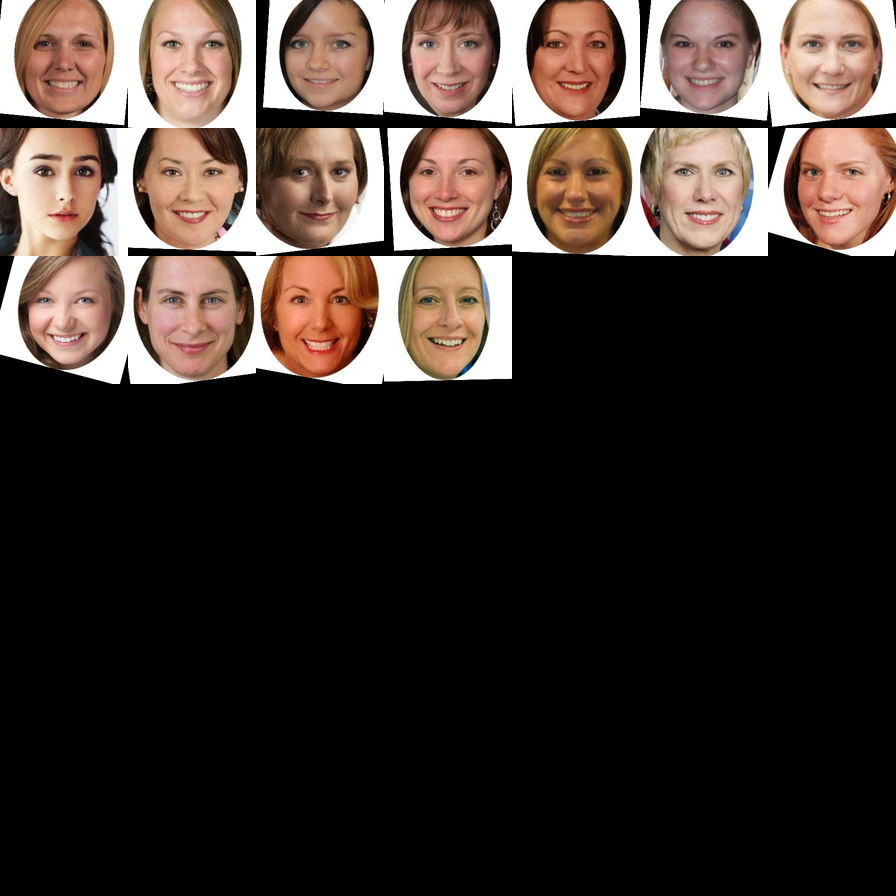

In [79]:
indices = df.ix[[idx for idx in df[df['vol'] < 0.5].index if idx.startswith('CF') ]].index
args = [idx for idx,path in enumerate(paths) if path in indices]

display(montagify([np.array(arrays_rescaled_[arg]) for arg in args],
    (128,128), 
    tiles=(7,7))
)
